In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
train_data.shape

(8982,)

In [4]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [5]:
train_data[3]

[1,
 4,
 686,
 867,
 558,
 4,
 37,
 38,
 309,
 2276,
 465,
 893,
 3541,
 114,
 2902,
 69,
 312,
 35,
 15,
 7,
 335,
 1679,
 21,
 25,
 3675,
 2,
 3498,
 58,
 69,
 68,
 493,
 5,
 25,
 465,
 377,
 2430,
 4,
 293,
 1172,
 739,
 4379,
 8,
 7,
 1510,
 1131,
 13,
 899,
 6,
 4,
 990,
 309,
 415,
 4519,
 6920,
 645,
 3916,
 791,
 5,
 4379,
 75,
 8,
 24,
 10,
 1311,
 4677,
 5,
 344,
 756,
 7,
 2,
 231,
 9691,
 2603,
 1413,
 43,
 509,
 43,
 68,
 327,
 5,
 2,
 3498,
 297,
 638,
 73,
 430,
 22,
 4,
 580,
 7,
 48,
 41,
 30,
 2,
 136,
 4,
 344,
 298,
 4,
 580,
 40,
 344,
 5078,
 2,
 291,
 1488,
 10,
 3148,
 5,
 231,
 6250,
 1308,
 5,
 8250,
 7043,
 21,
 2,
 1622,
 990,
 309,
 415,
 265,
 5992,
 8945,
 1149,
 9118,
 2,
 4,
 344,
 9691,
 756,
 3729,
 2,
 4667,
 2,
 3249,
 28,
 10,
 2190,
 24,
 77,
 41,
 682,
 10,
 4851,
 2048,
 7,
 4,
 5540,
 2926,
 1598,
 22,
 370,
 5954,
 7541,
 5,
 54,
 5232,
 1685,
 2916,
 10,
 1571,
 946,
 60,
 51,
 3249,
 5249,
 4,
 73,
 2135,
 669,
 4,
 580,
 64,
 10,
 4280,
 6,

In [6]:
train_labels.shape

(8982,)

In [7]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [8]:
train_labels[15]

8

In [9]:
"""Decoding data back to text"""
word_index = reuters.get_word_index()

reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])

decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in test_data[58]]
)

In [10]:
decoded_newswire

'? standard federal bank said it introduced a zero point fixed rate mortgage loan the loan program offers borrowers home mortgage financing with no discount fees charged standard said that fees charged will include an application fee commitment fee and out of ? expenses such as title work survey recording fees and private mortgage insurance reuter 3'

In [11]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [12]:
S_train = vectorize_sequences(train_data)
S_test = vectorize_sequences(test_data)

In [13]:
S_train[77]

array([0., 1., 0., ..., 0., 0., 0.])

In [14]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [15]:
y_train[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
S_Net = Sequential([
    Dense(64, activation = "swish"),
    Dense(64, activation = "swish"),
    Dense(46, activation = "softmax")
])

In [17]:
S_Net.compile(optimizer = "rmsprop", 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [18]:
S_val = S_train[:1000]
partial_S_train = S_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [19]:
hist = S_Net.fit(partial_S_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = [S_val,y_val])

Epoch 1/20
16/16 [==============================] - 3s 132ms/step - loss: 2.8086 - accuracy: 0.5253 - val_loss: 1.9375 - val_accuracy: 0.6050
Epoch 2/20
16/16 [==============================] - 2s 106ms/step - loss: 1.5939 - accuracy: 0.6779 - val_loss: 1.4237 - val_accuracy: 0.6830
Epoch 3/20
16/16 [==============================] - 2s 105ms/step - loss: 1.1810 - accuracy: 0.7521 - val_loss: 1.2052 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 2s 111ms/step - loss: 0.9319 - accuracy: 0.8043 - val_loss: 1.0928 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 2s 117ms/step - loss: 0.7443 - accuracy: 0.8441 - val_loss: 1.0183 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 2s 101ms/step - loss: 0.5936 - accuracy: 0.8731 - val_loss: 0.9709 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 2s 105ms/step - loss: 0.4778 - accuracy: 0.8994 - val_loss: 0.9459 - val_accuracy: 0.8100
Epoch 

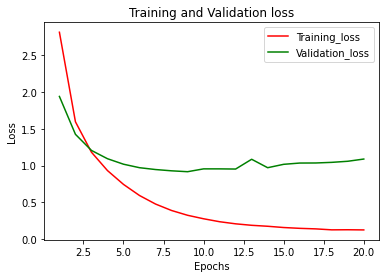

In [20]:
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, "r", label = "Training_loss")
plt.plot(epochs, val_loss, "g", label = "Validation_loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

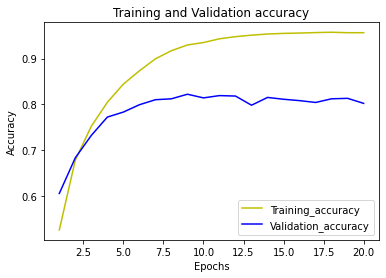

In [21]:
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, "y", label = "Training_accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation_accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
S_Net.evaluate(S_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.2646 - accuracy: 0.7863


[1.2645761966705322, 0.7862867116928101]